In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from urllib.parse import urlparse
from transliterate import translit
%matplotlib inline

In [2]:
# Read data from file
df = pd.read_csv('all_data.csv', sep=';', encoding='cp1251')

In [3]:
# Delete not need columns
df =  df.drop(
    columns={
        "Unnamed: 0",
        "author",
        "author_type",
        "deal_type",
        "accommodation_type",
        "phone",
        "underground",
        "residential_complex",
        "street"
    },
    axis=1,
)

<Axes: >

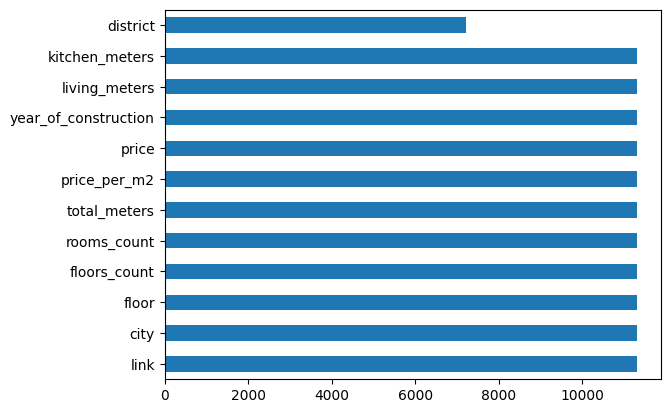

In [4]:
# Нарисовать граф с точностью df
df.count().plot(kind='barh')

In [5]:
def remove_domain(url):
    return url[:url.rfind('.cian.ru')]

In [6]:
# Get all links from Series
urls = df['link']

# Парсим ссылку,чтобы получить имя города
url_index = 0
for url in urls:

    is_correct_url = 'https://w' in url
    
    if is_correct_url != True:

        parsed_url = urlparse(url)

        # Trim domen name
        city_name = parsed_url.netloc
        city_name = remove_domain(city_name)



        # update value in series
        df['district'].values[url_index] = city_name
        df['city'].values[url_index] = city_name
        
        
    else:
        
        if pd.isnull(df['district'].loc[url_index]):
            df['district'].values[url_index] = 'moscow'
        else:
            df['district'].values[url_index] = (translit(df['district'].loc[url_index], 'ru', reversed=True)).lower()
        
        df['city'].values[url_index] = 'moscow'

    url_index += 1

In [7]:
# Drop 'link' because it's not need
df = df.drop(columns='link', axis=1,)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
# Change rows which have values less 0
def remove_negative_values(series_name, series_value):

    # Finds all negative values and replcaces them with zeroes
    df[series_name] = df[series_name].clip(lower=0)

    # Change all zero values to specific value
    df[series_name] = df[series_name].replace(0,int(series_value))

In [10]:
# Fix total meters value
def fix_total_meters(series_name):

    # Find Median of 'Total Meters' series
    mid_meters = np.median(df[series_name])

    # Settign median for all the values lower than one
    df[series_name] = df[series_name].clip(lower=1)

    # Change all zero values
    df[series_name] = df[series_name].replace(0, int(mid_meters))

<Axes: >

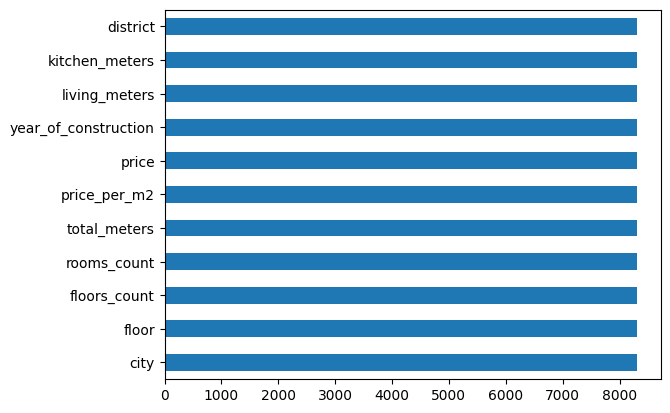

In [11]:
# Display dataframe state
df.count().plot(kind='barh')

In [12]:
# Filling missing data

mid = np.median(df['living_meters'].values)
remove_negative_values('living_meters', mid)

mid = np.median(df['kitchen_meters'].values)
remove_negative_values('kitchen_meters', mid)

mid = np.median(df['year_of_construction'].values)
remove_negative_values('year_of_construction', mid)

mid = np.median(df['floor'].values)
remove_negative_values('floor', mid)

mid = np.median(df['floors_count'].values)
remove_negative_values('floors_count', mid)

mid = np.median(df['rooms_count'].values)
remove_negative_values('rooms_count', mid)

mid = np.median(df['total_meters'].values)
remove_negative_values('total_meters', mid)

fix_total_meters('total_meters')

mid = np.median(df['price_per_m2'].values)
remove_negative_values('price_per_m2', mid)

mid = np.median(df['price'].values)
remove_negative_values('price', mid)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8307 entries, 0 to 11309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  8307 non-null   object 
 1   floor                 8307 non-null   int64  
 2   floors_count          8307 non-null   int64  
 3   rooms_count           8307 non-null   int64  
 4   total_meters          8307 non-null   float64
 5   price_per_m2          8307 non-null   int64  
 6   price                 8307 non-null   int64  
 7   year_of_construction  8307 non-null   int64  
 8   living_meters         8307 non-null   float64
 9   kitchen_meters        8307 non-null   float64
 10  district              8307 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 778.8+ KB


<Axes: >

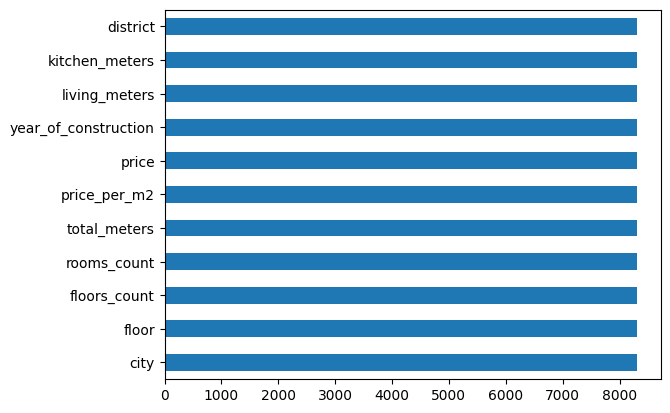

In [14]:
# Граф, показывающий на сколько точен df
df.count().plot(kind='barh')

In [15]:
df.shape

(8307, 11)

In [16]:
# save to file for test, if need uncomment
df.to_csv('clear_all_data.csv', sep=';', encoding='utf-8', index=False)